<a href="https://colab.research.google.com/github/PhilR1127/Data-699/blob/main/D699_UD11_2_23_Copy_of_BigQuery_bquxjob_23214ab4_18b90e71f32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'data-699' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=data-699:US:bquxjob_23214ab4_18b90e71f32)
back to BigQuery to edit the query within the BigQuery user interface.

In [443]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_23214ab4_18b90e71f32') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT subject_id,AGE_patient,AVG_HR,AVG_SBP, AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death FROM `data-699.12345.10_30_Patient_Admissions_for_Modeling_copy` 


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [444]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_23214ab4_18b90e71f32') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death
0,18179783,86,75.377358491,135.452830,68.943396,98.340909091,2208-04-30 16:47:00,2208-05-03 14:22:00,0,2212-01-22
1,11756261,62,65.842105263,139.055556,68.611111,98.842105263,2201-10-12 08:45:00,2201-10-14 18:06:00,0,2212-01-14
2,16477638,61,75.705882353,147.745098,67.725490,98.234042553,2210-10-09 14:33:00,2210-10-11 15:05:00,0,2211-09-16
3,13774741,91,86.903225806,138.774194,74.677419,98.322580645,2210-10-26 20:21:00,2210-10-30 12:30:00,0,2211-02-27
4,12844772,58,68.500000000,142.833333,77.000000,96.666666667,2211-01-14 13:14:00,2211-01-17 12:34:00,1,2211-01-17
...,...,...,...,...,...,...,...,...,...,...
119352,17027269,18,62.500000000,131.500000,88.000000,98.000000000,2189-10-04 17:28:00,2189-10-12 18:00:00,0,NaT
119353,17946600,18,92.000000000,126.000000,75.000000,98.000000000,2189-07-19 21:00:00,2189-07-26 14:30:00,0,NaT
119354,19531581,18,95.000000000,118.600000,80.200000,99.600000000,2196-08-17 18:40:00,2196-08-20 11:56:00,0,NaT
119355,17251355,18,70.000000000,109.000000,74.666667,99.666666667,2193-05-14 06:28:00,2193-05-16 11:15:00,0,NaT


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [445]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,119357.0,15013355.599244,2888151.019781,10000032.0,12502529.0,15026826.0,17521183.0,19999987.0
AGE_patient,119357.0,54.879974,20.220418,18.0,38.0,56.0,71.0,91.0
AVG_SBP,118825.0,128.253461,17.29913,10.0,116.076923,126.8,138.666667,293.0
AVG_DBP,118825.0,74.47109,93.537499,6.0,65.777778,72.666667,80.0,26028.5
inptdeath,119357.0,0.039646,0.195126,0.0,0.0,0.0,0.0,1.0


In [446]:
data_table.disable_dataframe_formatter()

In [447]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   subject_id     119357 non-null  Int64         
 1   AGE_patient    119357 non-null  Int64         
 2   AVG_HR         118846 non-null  object        
 3   AVG_SBP        118825 non-null  float64       
 4   AVG_DBP        118825 non-null  float64       
 5   AVG_O2SAT      117452 non-null  object        
 6   atime          119357 non-null  datetime64[ns]
 7   dtime          119357 non-null  datetime64[ns]
 8   inptdeath      119357 non-null  Int64         
 9   Date_of_Death  17676 non-null   dbdate        
dtypes: Int64(3), datetime64[ns](2), dbdate(1), float64(2), object(2)
memory usage: 9.4+ MB


In [448]:
import pandas as pd
import numpy as np

Need to add new variables and transform exisitng ones:

In [449]:
results['AVG_O2SAT'] = pd.to_numeric(results['AVG_O2SAT'])

In [450]:
results['AVG_HR'] = pd.to_numeric(results['AVG_HR'])

Create three new variables:
1. Pulse Pressure,
2.Maximum Heart Rate, and
3.Estimated Vo2 Max

In [451]:
results['Max_HR'] = (208-(results['AGE_patient']))

In [452]:
results['Pulse_Pressure'] = (((2*results['AVG_SBP']))+(results['AVG_DBP']))/3

In [453]:
results['Est_vO2_Max'] = (results['Max_HR'])/(results['AVG_HR'])*15.3

Create three additional time related variables:
1. Length of Stay
2.Time to Patient Death post Discharge

In [454]:
results['Length_of_Stay']=((results['dtime'])-(results['atime']))

In [455]:
results['Date_of_Death']= pd.to_datetime(results['Date_of_Death'])

In [456]:
results['Time_to_Outpatient_Death'] = ((results['Date_of_Death'])-results['dtime'])

In [457]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    118846 non-null  float64        
 3   AVG_SBP                   118825 non-null  float64        
 4   AVG_DBP                   118825 non-null  float64        
 5   AVG_O2SAT                 117452 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            118825 non-null  float64  

In [458]:
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [459]:
## confirm that all patients are unique (subject_id should = 119357)
results.nunique()

subject_id                  119357
AGE_patient                     73
AVG_HR                       15245
AVG_SBP                      23543
AVG_DBP                      20249
AVG_O2SAT                     5227
atime                       118936
dtime                       118644
inptdeath                        2
Date_of_Death                13641
Max_HR                          73
Pulse_Pressure               30567
Est_vO2_Max                  64381
Length_of_Stay               21578
Time_to_Outpatient_Death     12486
dtype: int64

In [460]:
## start exploring new data table
results.head(8)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
0,18179783,86,75.377358,135.452830,68.943396,98.340909,2208-04-30 16:47:00,2208-05-03 14:22:00,0,2212-01-22,122,113.283019,24.763404,2 days 21:35:00,1358 days 09:38:00
1,11756261,62,65.842105,139.055556,68.611111,98.842105,2201-10-12 08:45:00,2201-10-14 18:06:00,0,2212-01-14,146,115.574074,33.926619,2 days 09:21:00,3743 days 05:54:00
2,16477638,61,75.705882,147.745098,67.725490,98.234043,2210-10-09 14:33:00,2210-10-11 15:05:00,0,2211-09-16,147,121.071895,29.708392,2 days 00:32:00,339 days 08:55:00
3,13774741,91,86.903226,138.774194,74.677419,98.322581,2210-10-26 20:21:00,2210-10-30 12:30:00,0,2211-02-27,117,117.408602,20.598775,3 days 16:09:00,119 days 11:30:00
4,12844772,58,68.500000,142.833333,77.000000,96.666667,2211-01-14 13:14:00,2211-01-17 12:34:00,1,2211-01-17,150,120.888889,33.50365,2 days 23:20:00,-1 days +11:26:00
5,15338454,67,75.684211,153.842105,69.894737,96.562500,2210-12-01 17:55:00,2210-12-04 02:15:00,1,2210-12-04,141,125.859649,28.503964,2 days 08:20:00,-1 days +21:45:00
6,12648465,49,82.193833,108.553648,69.137339,99.378378,2210-07-20 03:56:00,2210-09-16 02:00:00,1,2210-09-16,159,95.414878,29.597111,57 days 22:04:00,-1 days +22:00:00
7,15566010,86,74.393939,104.878788,51.439394,97.424242,2210-09-07 20:50:00,2210-09-11 14:25:00,1,2210-09-11,122,87.065657,25.090754,3 days 17:35:00,-1 days +09:35:00


In [461]:
results.describe()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,inptdeath,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
count,119357.0,119357.0,118846.000000,118825.000000,118825.000000,117452.000000,119357.0,119357.0,118825.000000,119357.0,119357,17676
mean,15013355.599244,54.879974,80.746417,128.253461,74.471090,97.913155,0.039646,153.120026,110.326004,<NA>,4 days 05:36:44.826193687,98 days 08:18:55.037338765
std,2888151.019781,20.220418,14.192993,17.299130,93.537499,2.792009,0.195126,20.220418,33.766620,<NA>,6 days 14:38:54.676416964,216 days 18:41:20.077168744
min,10000032.0,18.0,7.000000,10.000000,6.000000,0.000000,0.0,117.0,10.666667,<NA>,-1 days +01:21:00,-2172 days +06:30:00
25%,12502529.0,38.0,71.000000,116.076923,65.777778,97.000000,0.0,137.0,100.333333,<NA>,0 days 22:48:00,-1 days +23:29:30
50%,15026826.0,56.0,79.500000,126.800000,72.666667,98.166667,0.0,152.0,109.083333,<NA>,2 days 12:19:00,26 days 11:00:00
75%,17521183.0,71.0,89.071429,138.666667,80.000000,99.000000,0.0,170.0,118.488889,<NA>,4 days 20:52:00,132 days 06:41:00
max,19999987.0,91.0,197.909091,293.000000,26028.500000,499.800000,1.0,190.0,8745.166667,<NA>,234 days 01:00:00,3901 days 20:30:00


In [462]:
## I realized I had somehow created the new Est_vO2_Max column as a "Float64" (capital F) dtype instead of a "float64" dtype .. not sure how, but found a reference to how to fix this issue
## on StackOverflow...https://stackoverflow.com/questions/69201668/pandas-float64-vs-float64-dtypes-note-capitalization-causing-non-numeric-error not sure what the original issue was though
results['Est_vO2_Max'] = results['Est_vO2_Max'].values.astype(float)

In [463]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    118846 non-null  float64        
 3   AVG_SBP                   118825 non-null  float64        
 4   AVG_DBP                   118825 non-null  float64        
 5   AVG_O2SAT                 117452 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            118825 non-null  float64  

In [464]:
results.describe()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,inptdeath,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
count,119357.0,119357.0,118846.000000,118825.000000,118825.000000,117452.000000,119357.0,119357.0,118825.000000,118846.000000,119357,17676
mean,15013355.599244,54.879974,80.746417,128.253461,74.471090,97.913155,0.039646,153.120026,110.326004,29.849081,4 days 05:36:44.826193687,98 days 08:18:55.037338765
std,2888151.019781,20.220418,14.192993,17.299130,93.537499,2.792009,0.195126,20.220418,33.766620,6.414420,6 days 14:38:54.676416964,216 days 18:41:20.077168744
min,10000032.0,18.0,7.000000,10.000000,6.000000,0.000000,0.0,117.0,10.666667,11.444400,-1 days +01:21:00,-2172 days +06:30:00
25%,12502529.0,38.0,71.000000,116.076923,65.777778,97.000000,0.0,137.0,100.333333,25.442697,0 days 22:48:00,-1 days +23:29:30
50%,15026826.0,56.0,79.500000,126.800000,72.666667,98.166667,0.0,152.0,109.083333,29.327688,2 days 12:19:00,26 days 11:00:00
75%,17521183.0,71.0,89.071429,138.666667,80.000000,99.000000,0.0,170.0,118.488889,33.636641,4 days 20:52:00,132 days 06:41:00
max,19999987.0,91.0,197.909091,293.000000,26028.500000,499.800000,1.0,190.0,8745.166667,340.971429,234 days 01:00:00,3901 days 20:30:00


Clean the data (remove or transform missing from tables of interest, and need to set up a target variable to run initial model - a logistic regression on a new variable called Survival (0 = patients that died either during admission or within one year of discharge,,, and 1 = patients that survived)

In [465]:
## check for null and not null values, focus on Date of Death (which appears to include both dates of inpatient and outpatient deaths)
results.notnull().sum()

subject_id                  119357
AGE_patient                 119357
AVG_HR                      118846
AVG_SBP                     118825
AVG_DBP                     118825
AVG_O2SAT                   117452
atime                       119357
dtime                       119357
inptdeath                   119357
Date_of_Death                17676
Max_HR                      119357
Pulse_Pressure              118825
Est_vO2_Max                 118846
Length_of_Stay              119357
Time_to_Outpatient_Death     17676
dtype: int64

In [466]:
results.isnull().sum()

subject_id                       0
AGE_patient                      0
AVG_HR                         511
AVG_SBP                        532
AVG_DBP                        532
AVG_O2SAT                     1905
atime                            0
dtime                            0
inptdeath                        0
Date_of_Death               101681
Max_HR                           0
Pulse_Pressure                 532
Est_vO2_Max                    511
Length_of_Stay                   0
Time_to_Outpatient_Death    101681
dtype: int64

Comparing "isnull_sum" variable counts to "notnull.sum() varaible counts shows that I will need to:

1- either remove or normalize the small number of Null values in the AVG_HR,
AVG_SBP, AVG_DBP, AVG_O2SAT, and AVG_Pulse_Pressure... since these are all fairly small numbers of missing rows (~500 to 1900) compared to the total number of patients of 119,357 in the dataframe of ... I am just going to set each of these missing values equal to the mean for that particlular variable.

2 - Set "Date of Death" to the dependant varaible for logisitic regression (as a new variable "Survival") There are 17,676 NOT-Null values in this column... these would correspond to a death event.. either inpatient or outpatient (Set "death" = 0)
There are 101,681 Null values in this column ... these would correspond to a patient living one year post discharge (Set "survival" = 1)

IF data in a colum is actually missing, can use fillna() method... ie results['AVG_SBP']fillna(128.253461) ... fill with the mean of AVG_SBP.

Then check transformed ['AVG_SBP] using results['AVG_SBP'].value_counts(dropna= false)... should see this 128.253461 show up 532 times (532 represents null though, not missing... need to doublecheck this)

once have all columns fixed for missing data, can apply results.hist(figsize =20,20) to look at outliers:

For target variable "Date_Of_Death" will need to change title to Survival and make 0 = death and 1 = survival.... so change all the null values to "1":


In [467]:
results['AVG_HR']=results['AVG_HR'].fillna(80.746417)
results['AVG_SBP']=results['AVG_SBP'].fillna(128.253461)
results['AVG_DBP']=results['AVG_DBP'].fillna(74.471090)
results['AVG_O2SAT']=results['AVG_O2SAT'].fillna(97.913155)
results['Pulse_Pressure']=results['Pulse_Pressure'].fillna(110.326004)
results['Est_vO2_Max']=results['Est_vO2_Max'].fillna(29.849081)

In [468]:
results.isnull().sum()

subject_id                       0
AGE_patient                      0
AVG_HR                           0
AVG_SBP                          0
AVG_DBP                          0
AVG_O2SAT                        0
atime                            0
dtime                            0
inptdeath                        0
Date_of_Death               101681
Max_HR                           0
Pulse_Pressure                   0
Est_vO2_Max                      0
Length_of_Stay                   0
Time_to_Outpatient_Death    101681
dtype: int64

In [469]:
## confirm that the means for the transored variables have not changed:
results.describe()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,inptdeath,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death
count,119357.0,119357.0,119357.000000,119357.000000,119357.000000,119357.000000,119357.0,119357.0,119357.000000,119357.000000,119357,17676
mean,15013355.599244,54.879974,80.746417,128.253461,74.471090,97.913155,0.039646,153.120026,110.326004,29.849081,4 days 05:36:44.826193687,98 days 08:18:55.037338765
std,2888151.019781,20.220418,14.162578,17.260534,93.328806,2.769638,0.195126,20.220418,33.691283,6.400674,6 days 14:38:54.676416964,216 days 18:41:20.077168744
min,10000032.0,18.0,7.000000,10.000000,6.000000,0.000000,0.0,117.0,10.666667,11.444400,-1 days +01:21:00,-2172 days +06:30:00
25%,12502529.0,38.0,71.000000,116.166667,65.823529,97.000000,0.0,137.0,100.333333,25.460395,0 days 22:48:00,-1 days +23:29:30
50%,15026826.0,56.0,79.571429,127.000000,72.750000,98.130435,0.0,152.0,109.166667,29.360341,2 days 12:19:00,26 days 11:00:00
75%,17521183.0,71.0,89.000000,138.600000,80.000000,99.000000,0.0,170.0,118.431373,33.613636,4 days 20:52:00,132 days 06:41:00
max,19999987.0,91.0,197.909091,293.000000,26028.500000,499.800000,1.0,190.0,8745.166667,340.971429,234 days 01:00:00,3901 days 20:30:00


In [470]:
results.notnull().sum()

subject_id                  119357
AGE_patient                 119357
AVG_HR                      119357
AVG_SBP                     119357
AVG_DBP                     119357
AVG_O2SAT                   119357
atime                       119357
dtime                       119357
inptdeath                   119357
Date_of_Death                17676
Max_HR                      119357
Pulse_Pressure              119357
Est_vO2_Max                 119357
Length_of_Stay              119357
Time_to_Outpatient_Death     17676
dtype: int64

array([[<Axes: title={'center': 'subject_id'}>,
        <Axes: title={'center': 'AGE_patient'}>,
        <Axes: title={'center': 'AVG_HR'}>,
        <Axes: title={'center': 'AVG_SBP'}>],
       [<Axes: title={'center': 'AVG_DBP'}>,
        <Axes: title={'center': 'AVG_O2SAT'}>,
        <Axes: title={'center': 'atime'}>,
        <Axes: title={'center': 'dtime'}>],
       [<Axes: title={'center': 'inptdeath'}>,
        <Axes: title={'center': 'Date_of_Death'}>,
        <Axes: title={'center': 'Max_HR'}>,
        <Axes: title={'center': 'Pulse_Pressure'}>],
       [<Axes: title={'center': 'Est_vO2_Max'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

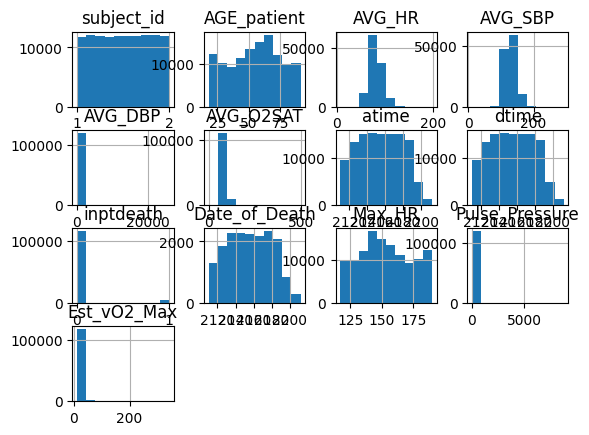

In [471]:
results.hist()

In [472]:
## will have to remove outliers for Est_vO2_Max for initial binary logistic regression... and then other columns for multiple variable

In [473]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            119357 non-null  float64  

Need to convert the "Date_of_Death" datetime column to a new numeric column "Surival" with only "1" for survival and "0" for deaths

In [474]:
##found this in stackoverflow ....if it works create new column
results['Date_of_Death'].dt.strftime("%Y%m%d").astype(float)

0         22120122.0
1         22120114.0
2         22110916.0
3         22110227.0
4         22110117.0
             ...    
119352           NaN
119353           NaN
119354           NaN
119355           NaN
119356           NaN
Name: Date_of_Death, Length: 119357, dtype: float64

In [475]:
results['Survival'] = results['Date_of_Death'].dt.strftime("%Y%m%d").astype(float)

In [476]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            119357 non-null  float64  

In [477]:
results.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
119354,19531581,18,95.0,118.6,80.200000,99.600000,2196-08-17 18:40:00,2196-08-20 11:56:00,0,NaT,190,105.800000,30.600000,2 days 17:16:00,NaT,NaN
119355,17251355,18,70.0,109.0,74.666667,99.666667,2193-05-14 06:28:00,2193-05-16 11:15:00,0,NaT,190,97.555556,41.528571,2 days 04:47:00,NaT,NaN
119356,14332783,18,74.0,103.5,62.250000,100.000000,2201-05-15 20:10:00,2201-05-18 15:10:00,0,NaT,190,89.750000,39.283784,2 days 19:00:00,NaT,NaN


In [478]:
results['Survival']=pd.to_numeric(results['Survival'])

In [479]:
results.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
119354,19531581,18,95.0,118.6,80.200000,99.600000,2196-08-17 18:40:00,2196-08-20 11:56:00,0,NaT,190,105.800000,30.600000,2 days 17:16:00,NaT,NaN
119355,17251355,18,70.0,109.0,74.666667,99.666667,2193-05-14 06:28:00,2193-05-16 11:15:00,0,NaT,190,97.555556,41.528571,2 days 04:47:00,NaT,NaN
119356,14332783,18,74.0,103.5,62.250000,100.000000,2201-05-15 20:10:00,2201-05-18 15:10:00,0,NaT,190,89.750000,39.283784,2 days 19:00:00,NaT,NaN


In [480]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            119357 non-null  float64  

In [481]:
results['Survival']=results['Survival'].fillna(1)

In [392]:
results.tail()

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
119352,17027269,18,62.5,131.5,88.000000,98.000000,2189-10-04 17:28:00,2189-10-12 18:00:00,0,NaT,190,117.000000,46.512000,8 days 00:32:00,NaT,1.0
119353,17946600,18,92.0,126.0,75.000000,98.000000,2189-07-19 21:00:00,2189-07-26 14:30:00,0,NaT,190,109.000000,31.597826,6 days 17:30:00,NaT,1.0
119354,19531581,18,95.0,118.6,80.200000,99.600000,2196-08-17 18:40:00,2196-08-20 11:56:00,0,NaT,190,105.800000,30.600000,2 days 17:16:00,NaT,1.0
119355,17251355,18,70.0,109.0,74.666667,99.666667,2193-05-14 06:28:00,2193-05-16 11:15:00,0,NaT,190,97.555556,41.528571,2 days 04:47:00,NaT,1.0
119356,14332783,18,74.0,103.5,62.250000,100.000000,2201-05-15 20:10:00,2201-05-18 15:10:00,0,NaT,190,89.750000,39.283784,2 days 19:00:00,NaT,1.0


In [482]:
##Have set the Surviving patients to "1", now attempting to set the Deceased patients to "0" in Target Variable "Survival"
results['Survival'][results['Survival']>1] = 0

<ipython-input-482-329827127b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Survival'][results['Survival']>1] = 0


In [483]:
results['Survival'].value_counts()

1.0    101681
0.0     17676
Name: Survival, dtype: int64

**The value counts for '1" and '0' are correct, so this seems to have worked despite the warning ....**

In [484]:
results.head(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
0,18179783,86,75.377358,135.452830,68.943396,98.340909,2208-04-30 16:47:00,2208-05-03 14:22:00,0,2212-01-22,122,113.283019,24.763404,2 days 21:35:00,1358 days 09:38:00,0.0
1,11756261,62,65.842105,139.055556,68.611111,98.842105,2201-10-12 08:45:00,2201-10-14 18:06:00,0,2212-01-14,146,115.574074,33.926619,2 days 09:21:00,3743 days 05:54:00,0.0
2,16477638,61,75.705882,147.745098,67.725490,98.234043,2210-10-09 14:33:00,2210-10-11 15:05:00,0,2211-09-16,147,121.071895,29.708392,2 days 00:32:00,339 days 08:55:00,0.0


In [485]:
results.tail(3)

,subject_id,AGE_patient,AVG_HR,AVG_SBP,AVG_DBP,AVG_O2SAT,atime,dtime,inptdeath,Date_of_Death,Max_HR,Pulse_Pressure,Est_vO2_Max,Length_of_Stay,Time_to_Outpatient_Death,Survival
119354,19531581,18,95.0,118.6,80.200000,99.600000,2196-08-17 18:40:00,2196-08-20 11:56:00,0,NaT,190,105.800000,30.600000,2 days 17:16:00,NaT,1.0
119355,17251355,18,70.0,109.0,74.666667,99.666667,2193-05-14 06:28:00,2193-05-16 11:15:00,0,NaT,190,97.555556,41.528571,2 days 04:47:00,NaT,1.0
119356,14332783,18,74.0,103.5,62.250000,100.000000,2201-05-15 20:10:00,2201-05-18 15:10:00,0,NaT,190,89.750000,39.283784,2 days 19:00:00,NaT,1.0


Now get rid of outliers in the Est_Vo2 Max column since I want to focus on this variable first. NML Est_vO2_Max should range from from ~15/20 for very poorly conditioned older people to ~50-60 for very fit younger patients

<Axes: >

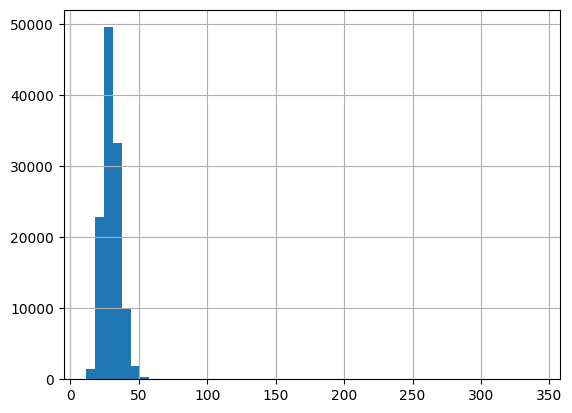

In [486]:
results['Est_vO2_Max'].hist(bins=50)

In [487]:
results['Est_vO2_Max'].describe()

count    119357.000000
mean         29.849081
std           6.400674
min          11.444400
25%          25.460395
50%          29.360341
75%          33.613636
max         340.971429
Name: Est_vO2_Max, dtype: float64

In [488]:
p99=results['Est_vO2_Max'].quantile(0.99)
print(p995)

49.5854827586207


<Axes: >

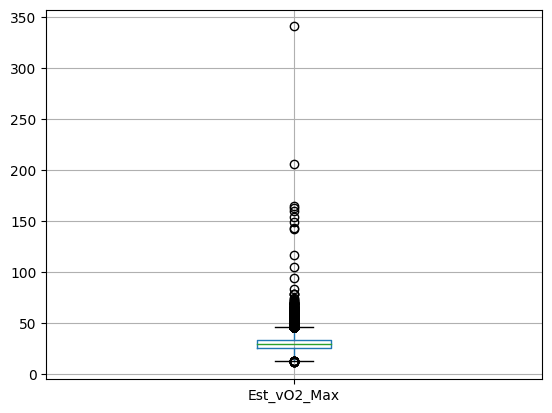

In [489]:
## there appears to be some unrelatistically high outliers:
results.boxplot('Est_vO2_Max')

In [490]:
count =(results['Est_vO2_Max'] > 60).sum()
print (count)

78


In [491]:
count =(results['Est_vO2_Max'] > 65).sum()
print (count)

45


In [429]:
p995=results['Est_vO2_Max'].quantile(0.995)
print(p995)

49.5854827586207


In [492]:
count =(results['Est_vO2_Max'] > p995).sum()
print (count)

597


In [434]:
p999=results['Est_vO2_Max'].quantile(0.999)
print(p999)

57.2026428114368


In [493]:
count =(results['Est_vO2_Max'] > p999).sum()
print (count)

120


In [494]:
results.loc[results['Est_vO2_Max']>p995,'Est_vO2_Max']=p995

In [495]:
results['Est_vO2_Max'].value_counts()

49.585483    597
29.849081    511
30.600000    511
38.250000    152
22.950000    119
            ... 
22.587858      1
28.854273      1
27.138817      1
31.120408      1
30.559790      1
Name: Est_vO2_Max, Length: 63916, dtype: int64

I may want to remove these outliers instead of cap them

Will need to get rid of outliers for other columns of interest (Pulse_Pressure, Lenght_Of_Stay, AGE_of_Patient... etc)

Will first look at an initial logistic regression **bold text**

In [514]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119357 entries, 0 to 119356
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   subject_id                119357 non-null  Int64          
 1   AGE_patient               119357 non-null  Int64          
 2   AVG_HR                    119357 non-null  float64        
 3   AVG_SBP                   119357 non-null  float64        
 4   AVG_DBP                   119357 non-null  float64        
 5   AVG_O2SAT                 119357 non-null  float64        
 6   atime                     119357 non-null  datetime64[ns] 
 7   dtime                     119357 non-null  datetime64[ns] 
 8   inptdeath                 119357 non-null  Int64          
 9   Date_of_Death             17676 non-null   datetime64[ns] 
 10  Max_HR                    119357 non-null  Int64          
 11  Pulse_Pressure            119357 non-null  float64  

In [516]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
subject_id,119357.0,15013355.599244,2888151.019781,10000032.0,12502529.0,15026826.0,17521183.0,19999987.0
AGE_patient,119357.0,54.879974,20.220418,18.0,38.0,56.0,71.0,91.0
AVG_HR,119357.0,80.746417,14.162578,7.0,71.0,79.571429,89.0,197.909091
AVG_SBP,119357.0,128.253461,17.260534,10.0,116.166667,127.0,138.6,293.0
AVG_DBP,119357.0,74.47109,93.328806,6.0,65.823529,72.75,80.0,26028.5
AVG_O2SAT,119357.0,97.913155,2.769638,0.0,97.0,98.130435,99.0,499.8
inptdeath,119357.0,0.039646,0.195126,0.0,0.0,0.0,0.0,1.0
Max_HR,119357.0,153.120026,20.220418,117.0,137.0,152.0,170.0,190.0
Pulse_Pressure,119357.0,110.326004,33.691283,10.666667,100.333333,109.166667,118.431373,8745.166667
Est_vO2_Max,119357.0,29.814868,6.143102,11.4444,25.460395,29.360341,33.613636,49.585483


In [498]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [512]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.25,shuffle=True)

In [513]:
##logreg= LogisticRegression(random_state=16)
####logreg.fit(X_train, y_train)
##y_pred =logreg.predict(X_test)